# ピアソンの相関係数とスピアマンの順位相関係数の概要説明

## ピアソンの相関係数 (Pearson's Correlation Coefficient)

ピアソンの相関係数は、2つの連続変数間の**線形関係**の強さを測定する指標です。

- **記号**: r
- **値の範囲**: -1 ≤ r ≤ 1
    - r = 1: 完全な正の線形関係
    - r = -1: 完全な負の線形関係
    - r = 0: 線形関係なし
- **前提条件**:
    - データが連続変数である
    - データが正規分布に従う(または近似する)
    - 関係が線形である
- **計算式**: 共分散を標準偏差の積で割った値
- **数式**: 
    ```
    r = Σ[(xi - x̄)(yi - ȳ)] / √[Σ(xi - x̄)² × Σ(yi - ȳ)²]
    ```
    $$
    r = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2 \sum_{i=1}^{n}(y_i - \bar{y})^2}}
    $$
    ここで、$x_i, y_i$ はデータ点、$\bar{x}, \bar{y}$ は平均値


## スピアマンの順位相関係数 (Spearman's Rank Correlation Coefficient)

スピアマンの順位相関係数は、2つの変数間の**単調関係**の強さを測定する指標です。

- **記号**: ρ (rho) または rs
- **値の範囲**: -1 ≤ ρ ≤ 1
    - ρ = 1: 完全な正の単調関係
    - ρ = -1: 完全な負の単調関係
    - ρ = 0: 単調関係なし
- **特徴**:
    - データを順位に変換してから計算
    - 非線形だが単調な関係も検出可能
    - 外れ値の影響を受けにくい
    - 順序尺度データにも適用可能
- **計算方法**: 順位データに対してピアソンの相関係数を適用
- **数式**: 
    $$
    \rho = 1 - \frac{6\sum_{i=1}^{n}d_i^2}{n(n^2 - 1)}
    $$
    ここで、$d_i$ は各データ点の2つの変数の順位差、$n$ はデータ点の数

## どちらを使うべきか?

- **ピアソン**: 線形関係を調べたい場合、データが正規分布に従う場合
- **スピアマン**: 非線形だが単調な関係を調べたい場合、外れ値がある場合、順序データの場合

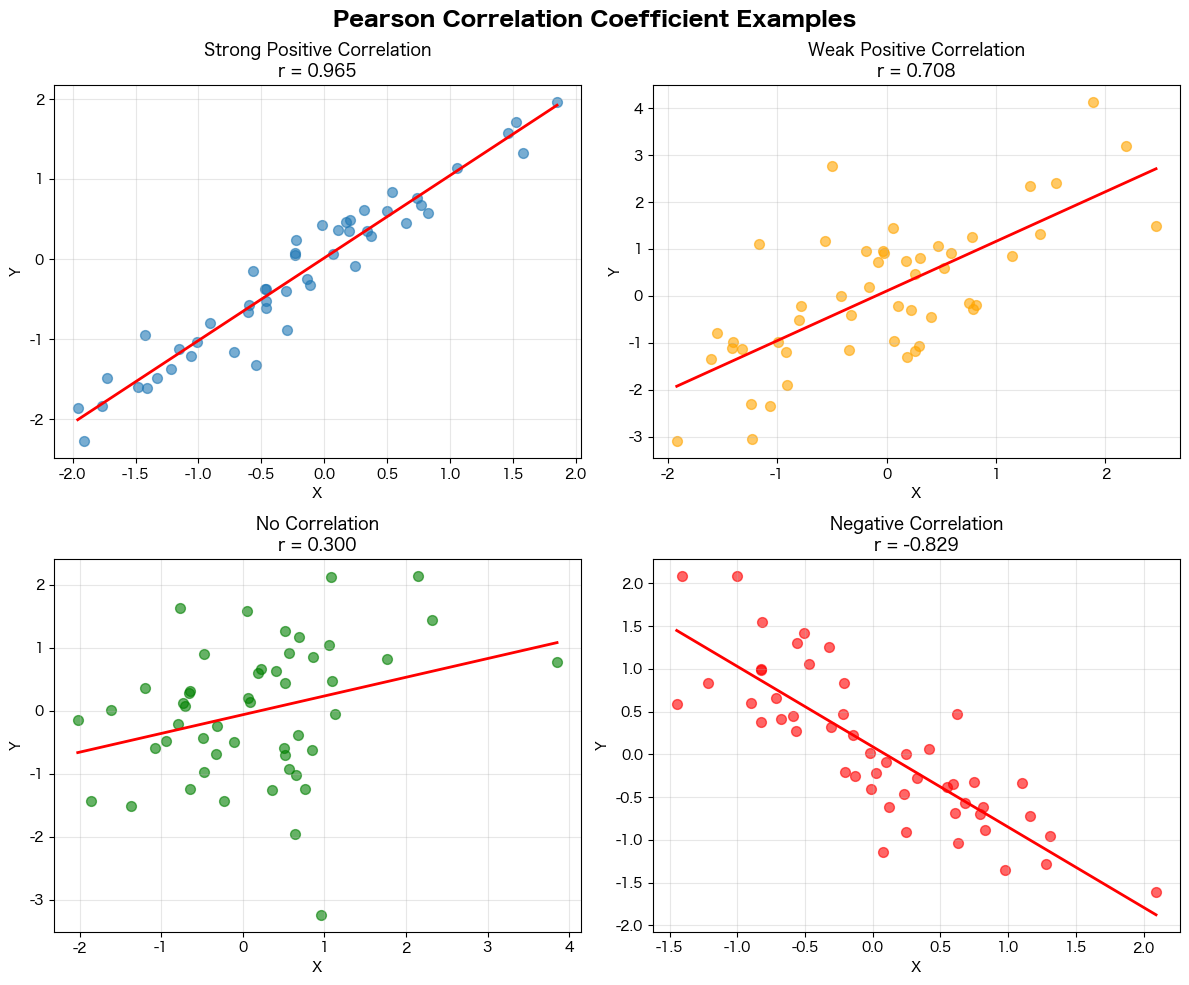

Pearson Correlation Coefficient Calculation

Example: Strong Positive Correlation
Sample size (n): 50
Mean of X: -0.225
Mean of Y: -0.220
Standard deviation of X: 0.934
Standard deviation of Y: 0.997
Covariance: 0.899
Pearson's r = 0.965


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

# 日本語フォントの設定（macOS用）
# matplotlibのフォント警告を抑制
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

# macOSで利用可能なフォントを優先的に使用
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Hiragino Sans', 'Hiragino Maru Gothic Pro', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 異なる相関係数を持つデータセットを生成
np.random.seed(42)
n = 50

# 1. 強い正の相関 (r ≈ 0.9)
x1 = np.random.randn(n)
y1 = x1 + np.random.randn(n) * 0.3

# 2. 弱い正の相関 (r ≈ 0.5)
x2 = np.random.randn(n)
y2 = x2 + np.random.randn(n) * 1.2

# 3. 相関なし (r ≈ 0)
x3 = np.random.randn(n)
y3 = np.random.randn(n)

# 4. 負の相関 (r ≈ -0.8)
x4 = np.random.randn(n)
y4 = -x4 + np.random.randn(n) * 0.5

# 相関係数を計算
r1 = np.corrcoef(x1, y1)[0, 1]
r2 = np.corrcoef(x2, y2)[0, 1]
r3 = np.corrcoef(x3, y3)[0, 1]
r4 = np.corrcoef(x4, y4)[0, 1]

# 散布図を作成
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Pearson Correlation Coefficient Examples', fontsize=16, fontweight='bold')

# プロット1: 強い正の相関
axes[0, 0].scatter(x1, y1, alpha=0.6, s=50)
axes[0, 0].plot(np.unique(x1), np.poly1d(np.polyfit(x1, y1, 1))(np.unique(x1)), 'r-', linewidth=2)
axes[0, 0].set_title(f'Strong Positive Correlation\nr = {r1:.3f}', fontsize=12)
axes[0, 0].set_xlabel('X')
axes[0, 0].set_ylabel('Y')
axes[0, 0].grid(True, alpha=0.3)

# プロット2: 弱い正の相関
axes[0, 1].scatter(x2, y2, alpha=0.6, s=50, color='orange')
axes[0, 1].plot(np.unique(x2), np.poly1d(np.polyfit(x2, y2, 1))(np.unique(x2)), 'r-', linewidth=2)
axes[0, 1].set_title(f'Weak Positive Correlation\nr = {r2:.3f}', fontsize=12)
axes[0, 1].set_xlabel('X')
axes[0, 1].set_ylabel('Y')
axes[0, 1].grid(True, alpha=0.3)

# プロット3: 相関なし
axes[1, 0].scatter(x3, y3, alpha=0.6, s=50, color='green')
axes[1, 0].plot(np.unique(x3), np.poly1d(np.polyfit(x3, y3, 1))(np.unique(x3)), 'r-', linewidth=2)
axes[1, 0].set_title(f'No Correlation\nr = {r3:.3f}', fontsize=12)
axes[1, 0].set_xlabel('X')
axes[1, 0].set_ylabel('Y')
axes[1, 0].grid(True, alpha=0.3)

# プロット4: 負の相関
axes[1, 1].scatter(x4, y4, alpha=0.6, s=50, color='red')
axes[1, 1].plot(np.unique(x4), np.poly1d(np.polyfit(x4, y4, 1))(np.unique(x4)), 'r-', linewidth=2)
axes[1, 1].set_title(f'Negative Correlation\nr = {r4:.3f}', fontsize=12)
axes[1, 1].set_xlabel('X')
axes[1, 1].set_ylabel('Y')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 相関係数の計算式を詳しく説明
print("=" * 60)
print("Pearson Correlation Coefficient Calculation")
print("=" * 60)
print("\nExample: Strong Positive Correlation")
print(f"Sample size (n): {n}")
print(f"Mean of X: {np.mean(x1):.3f}")
print(f"Mean of Y: {np.mean(y1):.3f}")
print(f"Standard deviation of X: {np.std(x1, ddof=1):.3f}")
print(f"Standard deviation of Y: {np.std(y1, ddof=1):.3f}")
print(f"Covariance: {np.cov(x1, y1)[0, 1]:.3f}")
print(f"Pearson's r = {r1:.3f}")

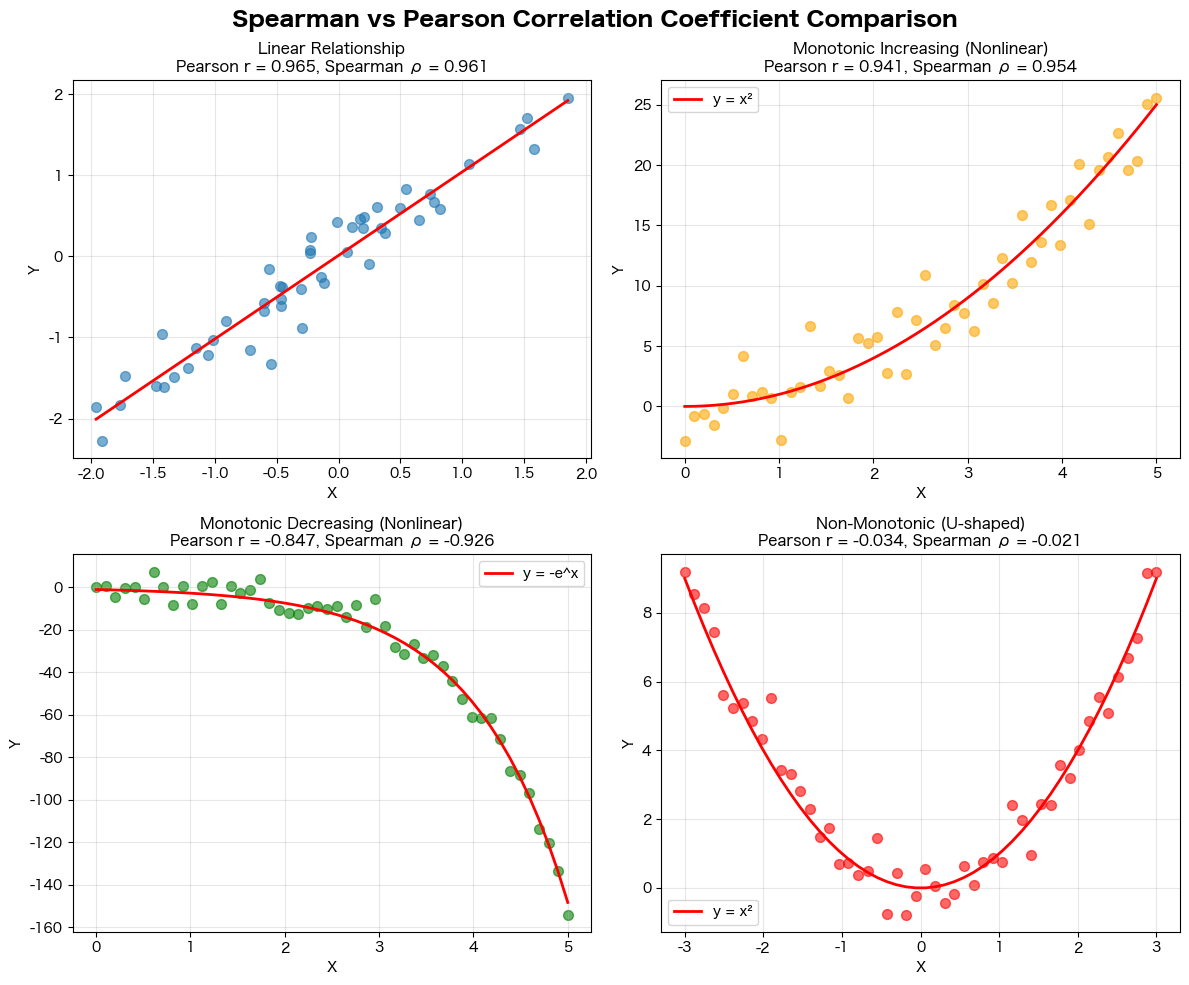

Spearman's Rank Correlation Coefficient vs Pearson's Correlation

【ケース1】線形関係
  Pearson r  = 0.965 (高い)
  Spearman ρ = 0.961 (高い)
  → 両方とも強い相関を検出

【ケース2】非線形だが単調増加 (y = x²)
  Pearson r  = 0.941 (やや低い)
  Spearman ρ = 0.954 (非常に高い)
  → スピアマンは単調性を正しく検出

【ケース3】非線形だが単調減少 (y = -e^x)
  Pearson r  = -0.847 (負の相関)
  Spearman ρ = -0.926 (強い負の相関)
  → スピアマンは単調減少を正しく検出

【ケース4】U字型の関係 (非単調)
  Pearson r  = -0.034 (ほぼ0)
  Spearman ρ = -0.021 (ほぼ0)
  → 両方とも単調関係がないことを検出

結論:
• ピアソン相関係数は線形関係を測定
• スピアマン順位相関係数は単調関係を測定
• 非線形だが単調な関係では、スピアマンの方が適切
• 外れ値の影響を受けにくいのはスピアマン


In [37]:
from scipy.stats import spearmanr

# スピアマンの順位相関係数を示すデータセットを生成
np.random.seed(42)

# 1. 線形関係 (ピアソンもスピアマンも高い)
x_s1 = np.random.randn(n)
y_s1 = x_s1 + np.random.randn(n) * 0.3

# 2. 非線形だが単調増加 (スピアマンは高いがピアソンは低め)
x_s2 = np.linspace(0, 5, n)
y_s2 = x_s2**2 + np.random.randn(n) * 2

# 3. 非線形だが単調減少 (スピアマンは負、ピアソンも負)
x_s3 = np.linspace(0, 5, n)
y_s3 = -np.exp(x_s3) + np.random.randn(n) * 5

# 4. U字型の関係 (スピアマンもピアソンも低い)
x_s4 = np.linspace(-3, 3, n)
y_s4 = x_s4**2 + np.random.randn(n) * 0.5

# 相関係数を計算
pearson_r1 = np.corrcoef(x_s1, y_s1)[0, 1]
spearman_r1 = spearmanr(x_s1, y_s1)[0]

pearson_r2 = np.corrcoef(x_s2, y_s2)[0, 1]
spearman_r2 = spearmanr(x_s2, y_s2)[0]

pearson_r3 = np.corrcoef(x_s3, y_s3)[0, 1]
spearman_r3 = spearmanr(x_s3, y_s3)[0]

pearson_r4 = np.corrcoef(x_s4, y_s4)[0, 1]
spearman_r4 = spearmanr(x_s4, y_s4)[0]

# 散布図を作成
fig2, axes2 = plt.subplots(2, 2, figsize=(12, 10))
fig2.suptitle('Spearman vs Pearson Correlation Coefficient Comparison', fontsize=16, fontweight='bold')

# プロット1: 線形関係
axes2[0, 0].scatter(x_s1, y_s1, alpha=0.6, s=50)
axes2[0, 0].plot(np.unique(x_s1), np.poly1d(np.polyfit(x_s1, y_s1, 1))(np.unique(x_s1)), 'r-', linewidth=2)
axes2[0, 0].set_title(f'Linear Relationship\nPearson r = {pearson_r1:.3f}, Spearman ρ = {spearman_r1:.3f}', fontsize=11)
axes2[0, 0].set_xlabel('X')
axes2[0, 0].set_ylabel('Y')
axes2[0, 0].grid(True, alpha=0.3)

# プロット2: 非線形だが単調増加
axes2[0, 1].scatter(x_s2, y_s2, alpha=0.6, s=50, color='orange')
axes2[0, 1].plot(x_s2, x_s2**2, 'r-', linewidth=2, label='y = x²')
axes2[0, 1].set_title(f'Monotonic Increasing (Nonlinear)\nPearson r = {pearson_r2:.3f}, Spearman ρ = {spearman_r2:.3f}', fontsize=11)
axes2[0, 1].set_xlabel('X')
axes2[0, 1].set_ylabel('Y')
axes2[0, 1].grid(True, alpha=0.3)
axes2[0, 1].legend()

# プロット3: 非線形だが単調減少
axes2[1, 0].scatter(x_s3, y_s3, alpha=0.6, s=50, color='green')
axes2[1, 0].plot(x_s3, -np.exp(x_s3), 'r-', linewidth=2, label='y = -e^x')
axes2[1, 0].set_title(f'Monotonic Decreasing (Nonlinear)\nPearson r = {pearson_r3:.3f}, Spearman ρ = {spearman_r3:.3f}', fontsize=11)
axes2[1, 0].set_xlabel('X')
axes2[1, 0].set_ylabel('Y')
axes2[1, 0].grid(True, alpha=0.3)
axes2[1, 0].legend()

# プロット4: U字型（非単調）
axes2[1, 1].scatter(x_s4, y_s4, alpha=0.6, s=50, color='red')
axes2[1, 1].plot(x_s4, x_s4**2, 'r-', linewidth=2, label='y = x²')
axes2[1, 1].set_title(f'Non-Monotonic (U-shaped)\nPearson r = {pearson_r4:.3f}, Spearman ρ = {spearman_r4:.3f}', fontsize=11)
axes2[1, 1].set_xlabel('X')
axes2[1, 1].set_ylabel('Y')
axes2[1, 1].grid(True, alpha=0.3)
axes2[1, 1].legend()

plt.tight_layout()
plt.show()

# 詳細な説明を出力
print("=" * 70)
print("Spearman's Rank Correlation Coefficient vs Pearson's Correlation")
print("=" * 70)
print("\n【ケース1】線形関係")
print(f"  Pearson r  = {pearson_r1:.3f} (高い)")
print(f"  Spearman ρ = {spearman_r1:.3f} (高い)")
print("  → 両方とも強い相関を検出")

print("\n【ケース2】非線形だが単調増加 (y = x²)")
print(f"  Pearson r  = {pearson_r2:.3f} (やや低い)")
print(f"  Spearman ρ = {spearman_r2:.3f} (非常に高い)")
print("  → スピアマンは単調性を正しく検出")

print("\n【ケース3】非線形だが単調減少 (y = -e^x)")
print(f"  Pearson r  = {pearson_r3:.3f} (負の相関)")
print(f"  Spearman ρ = {spearman_r3:.3f} (強い負の相関)")
print("  → スピアマンは単調減少を正しく検出")

print("\n【ケース4】U字型の関係 (非単調)")
print(f"  Pearson r  = {pearson_r4:.3f} (ほぼ0)")
print(f"  Spearman ρ = {spearman_r4:.3f} (ほぼ0)")
print("  → 両方とも単調関係がないことを検出")

print("\n" + "=" * 70)
print("結論:")
print("=" * 70)
print("• ピアソン相関係数は線形関係を測定")
print("• スピアマン順位相関係数は単調関係を測定")
print("• 非線形だが単調な関係では、スピアマンの方が適切")
print("• 外れ値の影響を受けにくいのはスピアマン")

## チャタジーの順位相関係数 (Chatterjee's Correlation Coefficient)

チャタジーの順位相関係数は、2021年に提案された比較的新しい相関指標で、**一方の変数が他方の変数の関数である程度**を測定します。

### 基本情報

- **記号**: ξ (xi) または ξn
- **値の範囲**: 0 ≤ ξ ≤ 1
    - ξ = 0: 関数関係なし(独立)
    - ξ = 1: 完全な関数関係(Y = f(X)の形)
    - 注意: 負の値を取らない(方向性を示さない)

### 主な特徴

- **非対称性**: ξ(X,Y) ≠ ξ(Y,X) の場合がある
- **関数関係の検出**: Y = f(X)の形の関数関係を検出できる(fは任意の関数)
- **単調性の要求なし**: 非単調な関係(U字型、山型など)も検出可能
- **ノンパラメトリック**: 分布の仮定が不要
- **外れ値への頑健性**: 順位ベースのため外れ値の影響を受けにくい

### ピアソン・スピアマンとの比較

| 特性 | ピアソン | スピアマン | チャタジー |
|------|---------|----------|----------|
| 検出する関係 | 線形 | 単調 | 任意の関数 |
| 値の範囲 | [-1, 1] | [-1, 1] | [0, 1] |
| 対称性 | 対称 | 対称 | 非対称 |
| 非単調関係 | ✗ | ✗ | ✓ |
| 方向性 | あり | あり | なし |

### 計算方法

1. Xの値で観測データをソート
2. Y値の順位を計算
3. 隣接するY順位の差を利用して統計量を計算

**数式**:
$$
\xi_n(X,Y) = 1 - \frac{3\sum_{i=1}^{n-1}|r_{i+1} - r_i|}{n^2 - 1}
$$

ここで、$r_i$ はXでソートした後のYの順位

**直感的な理解**: 
- Xでソート後、隣接する点のY順位の差を測定
- 関数関係が強いほど、隣接点のY順位が近くなる
- 順位差の合計が小さいほど、ξは1に近づく

### 使用すべき場面

- **Y = f(X)の形の関係**を調べたい場合
- **非単調な関係**(U字型、逆U字型など)を検出したい場合
- XがYに影響を与えるが、その関係が複雑な場合
- 因果関係の可能性を探索する場合

### 制限事項

- 方向性(正負)の情報がない
- 非対称なため、X→YとY→Xを別々に評価する必要がある
- 比較的新しい指標のため、解釈に注意が必要

In [38]:
def chatterjee_correlation(x, y):
    """
    Chatterjee順位相関係数を計算する関数
    
    Parameters:
    -----------
    x, y : array-like
        入力データ
    
    Returns:
    --------
    xi : float
        Chatterjee相関係数 (0 <= xi <= 1)
    """
    n = len(x)
    # Xでソート
    sorted_indices = np.argsort(x)
    y_sorted = y[sorted_indices]
    
    # Yの順位を計算（scipy.stats.rankdataを使用）
    from scipy.stats import rankdata
    ranks = rankdata(y_sorted, method='ordinal')
    
    # 隣接する順位の差の絶対値の和を計算
    rank_diffs = np.abs(np.diff(ranks))
    sum_diffs = np.sum(rank_diffs)
    
    # Chatterjee相関係数を計算
    xi = 1 - (3 * sum_diffs) / (n**2 - 1)
    
    return xi, ranks, rank_diffs

# 簡単な例で計算過程を可視化
print("=" * 70)
print("Chatterjee順位相関係数の計算プロセス")
print("=" * 70)

# 10個のデータ点を生成（記事の図に近いデータ）
np.random.seed(100)
n_example = 10
x_example = np.random.uniform(0, 10, n_example)
y_example = x_example**1.5 + np.random.normal(0, 3, n_example)

# Chatterjee相関を計算
xi, ranks, rank_diffs = chatterjee_correlation(x_example, y_example)

print(f"\nサンプルサイズ: n = {n_example}")
print(f"Chatterjee相関係数: ξ = {xi:.3f}")
print(f"\n隣接Y順位差の合計: {np.sum(rank_diffs)}")
print(f"正規化係数: 3 / (n² - 1) = 3 / {n_example**2 - 1} = {3/(n_example**2-1):.4f}")

Chatterjee順位相関係数の計算プロセス

サンプルサイズ: n = 10
Chatterjee相関係数: ξ = 0.667

隣接Y順位差の合計: 11
正規化係数: 3 / (n² - 1) = 3 / 99 = 0.0303


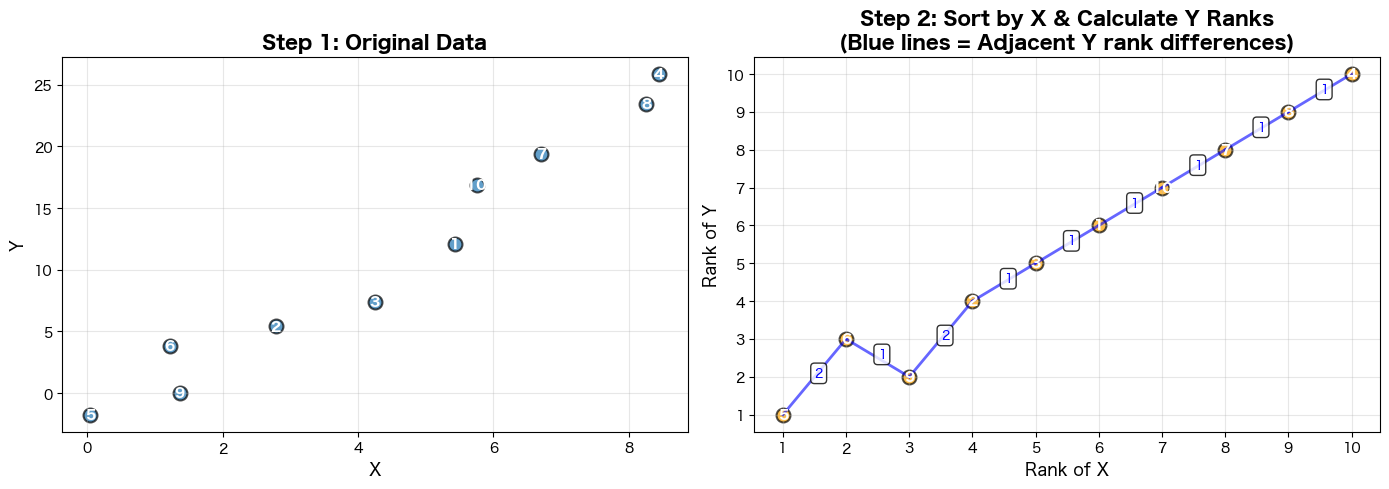


隣接するY順位の差:
点5 → 点6: |r_2 - r_1| = 2
点6 → 点9: |r_3 - r_2| = 1
点9 → 点2: |r_4 - r_3| = 2
点2 → 点3: |r_5 - r_4| = 1
点3 → 点1: |r_6 - r_5| = 1
点1 → 点10: |r_7 - r_6| = 1
点10 → 点7: |r_8 - r_7| = 1
点7 → 点8: |r_9 - r_8| = 1
点8 → 点4: |r_10 - r_9| = 1


In [39]:
# ステップバイステップで可視化
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Original data
axes[0].scatter(x_example, y_example, s=100, alpha=0.7, edgecolors='black', linewidth=1.5)
for i, (xi, yi) in enumerate(zip(x_example, y_example)):
    axes[0].annotate(f'{i+1}', (xi, yi), fontsize=10, ha='center', va='center', color='white', weight='bold')
axes[0].set_xlabel('X', fontsize=12)
axes[0].set_ylabel('Y', fontsize=12)
axes[0].set_title('Step 1: Original Data', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Xでソートしたインデックス
sorted_indices = np.argsort(x_example)
x_sorted = x_example[sorted_indices]
y_sorted = y_example[sorted_indices]

# Right: After sorting by X (rank transformation)
from scipy.stats import rankdata
x_ranks = np.arange(1, n_example + 1)  # X ranks: 1,2,3,...,n
y_ranks = rankdata(y_sorted, method='ordinal')  # Y ranks

axes[1].scatter(x_ranks, y_ranks, s=100, alpha=0.7, edgecolors='black', linewidth=1.5, color='orange')
for i in range(len(x_ranks)):
    axes[1].annotate(f'{sorted_indices[i]+1}', (x_ranks[i], y_ranks[i]), 
                    fontsize=10, ha='center', va='center', color='white', weight='bold')

# 隣接点を線で結ぶ（青線）
for i in range(len(x_ranks) - 1):
    axes[1].plot([x_ranks[i], x_ranks[i+1]], [y_ranks[i], y_ranks[i+1]], 
                'b-', linewidth=2, alpha=0.6)
    # 線の中点に距離を表示
    mid_x = (x_ranks[i] + x_ranks[i+1]) / 2
    mid_y = (y_ranks[i] + y_ranks[i+1]) / 2
    diff = abs(y_ranks[i+1] - y_ranks[i])
    axes[1].text(mid_x, mid_y, f'{int(diff)}', fontsize=9, color='blue', 
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

axes[1].set_xlabel('Rank of X', fontsize=12)
axes[1].set_ylabel('Rank of Y', fontsize=12)
axes[1].set_title(f'Step 2: Sort by X & Calculate Y Ranks\n(Blue lines = Adjacent Y rank differences)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(x_ranks)
axes[1].set_yticks(y_ranks)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("隣接するY順位の差:")
print("=" * 70)
for i in range(len(rank_diffs)):
    print(f"点{sorted_indices[i]+1} → 点{sorted_indices[i+1]+1}: |r_{i+2} - r_{i+1}| = {int(rank_diffs[i])}")

### Chatterjee相関の直感的理解

上の図から分かること:

1. **左図**: 元のデータを散布図で表示
2. **右図**: Xの順位で並べ替え、Y値の順位を計算
   - 青線は隣接する点同士を結んでいる
   - 青線上の数字は **隣接するY順位の差** を表す

**重要なポイント**:
- YがXの関数 (Y = f(X)) の場合、Xでソートすると**Yもほぼソートされる**
- つまり、隣接点のY順位が近くなり、**青線の長さの合計が小さくなる**
- 逆に独立な場合、Y順位はバラバラで**青線の長さの合計が大きくなる**

**計算式の意味**:
$$\xi = 1 - \frac{3 \times \text{(青線の長さの合計)}}{n^2 - 1}$$

- 青線の合計が小さい → ξ は1に近い → 強い関数関係
- 青線の合計が大きい → ξ は0に近い → 関係性が弱い

Comparison of Chatterjee Correlation Across Various Relationships

【Linear (Y = X)】
  Pearson correlation:     r  =  0.951
  Spearman correlation:    ρ  =  0.949
  Chatterjee correlation:  ξ  =  0.703

【Nonlinear Monotonic (Y = X^3)】
  Pearson correlation:     r  =  0.858
  Spearman correlation:    ρ  =  0.853
  Chatterjee correlation:  ξ  =  0.520

【Nonlinear Non-monotonic (Y = X^2)】
  Pearson correlation:     r  = -0.002
  Spearman correlation:    ρ  = -0.005
  Chatterjee correlation:  ξ  =  0.772

【Independent (No correlation)】
  Pearson correlation:     r  = -0.089
  Spearman correlation:    ρ  = -0.073
  Chatterjee correlation:  ξ  =  0.060


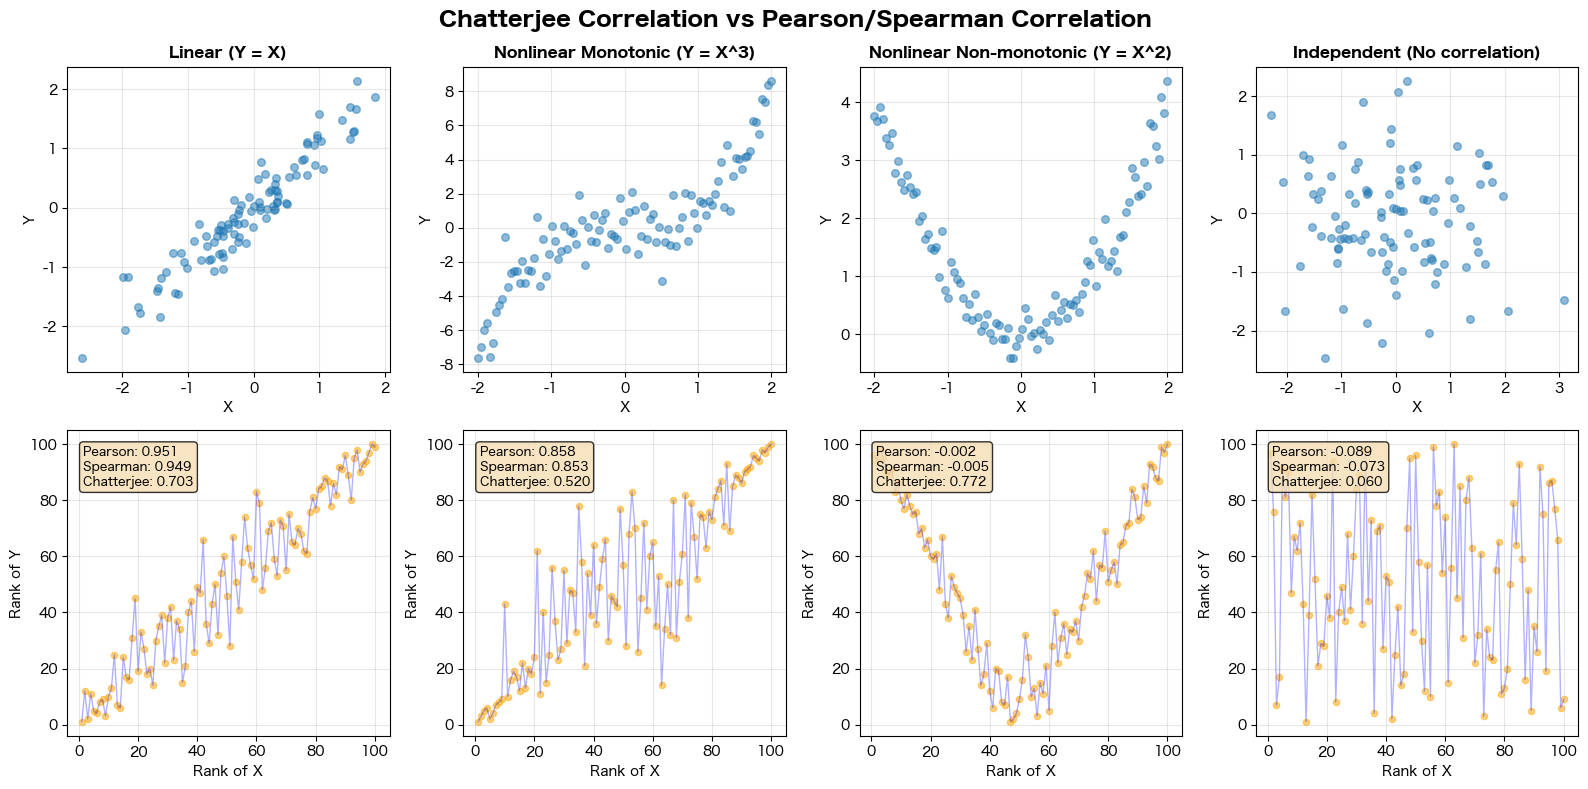


Analysis:
• Linear relationship: All correlation coefficients are high
• Nonlinear monotonic: Spearman and Chatterjee are high, Pearson is lower
• U-shaped: Pearson and Spearman are near 0, Chatterjee detects functional relationship
• Independent: All correlation coefficients are near 0


In [40]:
# Comparison experiment with larger sample size
print("=" * 70)
print("Comparison of Chatterjee Correlation Across Various Relationships")
print("=" * 70)

np.random.seed(42)
n_large = 100

# 1. Linear relationship (Y = X)
x_linear = np.random.randn(n_large)
y_linear = x_linear + np.random.randn(n_large) * 0.3

# 2. Nonlinear monotonic increasing (Y = X³)
x_cubic = np.linspace(-2, 2, n_large)
y_cubic = x_cubic**3 + np.random.randn(n_large) * 1

# 3. Nonlinear non-monotonic (Y = X²) - U-shaped
x_quad = np.linspace(-2, 2, n_large)
y_quad = x_quad**2 + np.random.randn(n_large) * 0.3

# 4. Independent relationship
x_indep = np.random.randn(n_large)
y_indep = np.random.randn(n_large)

# Calculate correlation coefficients for each
datasets = [
    ("Linear (Y = X)", x_linear, y_linear),
    ("Nonlinear Monotonic (Y = X^3)", x_cubic, y_cubic),
    ("Nonlinear Non-monotonic (Y = X^2)", x_quad, y_quad),
    ("Independent (No correlation)", x_indep, y_indep)
]

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Chatterjee Correlation vs Pearson/Spearman Correlation', fontsize=16, fontweight='bold')

for idx, (name, x, y) in enumerate(datasets):
    # 相関係数を計算
    pearson_r = np.corrcoef(x, y)[0, 1]
    spearman_r = spearmanr(x, y)[0]
    chatterjee_xi, _, _ = chatterjee_correlation(x, y)
    
    # 上段: 元のデータ
    axes[0, idx].scatter(x, y, alpha=0.5, s=30)
    axes[0, idx].set_title(name, fontsize=11, fontweight='bold')
    axes[0, idx].set_xlabel('X')
    axes[0, idx].set_ylabel('Y')
    axes[0, idx].grid(True, alpha=0.3)
    
    # 下段: Xでソート後のY順位
    sorted_indices = np.argsort(x)
    y_sorted = y[sorted_indices]
    y_ranks = rankdata(y_sorted, method='ordinal')
    x_ranks = np.arange(1, len(x) + 1)
    
    axes[1, idx].scatter(x_ranks, y_ranks, alpha=0.5, s=20, color='orange')
    axes[1, idx].plot(x_ranks, y_ranks, 'b-', alpha=0.3, linewidth=1)
    axes[1, idx].set_xlabel('Rank of X')
    axes[1, idx].set_ylabel('Rank of Y')
    axes[1, idx].grid(True, alpha=0.3)
    
    # 相関係数を表示
    axes[1, idx].text(0.05, 0.95, 
                     f'Pearson: {pearson_r:.3f}\nSpearman: {spearman_r:.3f}\nChatterjee: {chatterjee_xi:.3f}',
                     transform=axes[1, idx].transAxes,
                     fontsize=9,
                     verticalalignment='top',
                     bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    print(f"\n【{name}】")
    print(f"  Pearson correlation:     r  = {pearson_r:6.3f}")
    print(f"  Spearman correlation:    ρ  = {spearman_r:6.3f}")
    print(f"  Chatterjee correlation:  ξ  = {chatterjee_xi:6.3f}")

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("Analysis:")
print("=" * 70)
print("• Linear relationship: All correlation coefficients are high")
print("• Nonlinear monotonic: Spearman and Chatterjee are high, Pearson is lower")
print("• U-shaped: Pearson and Spearman are near 0, Chatterjee detects functional relationship")
print("• Independent: All correlation coefficients are near 0")

### 重要な発見: U字型（非単調）関係の検出

**U字型関係 (Y = X²) での比較:**

- **Pearson相関 ≈ 0**: 線形関係がないため
- **Spearman相関 ≈ 0**: 単調ではないため
- **Chatterjee相関 > 0**: Y = f(X) の関数関係を検出！

これがChatterjee相関の最大の強みです。従来の相関係数では見逃してしまう**非単調な関数関係**も検出できます。

Asymmetry of Chatterjee Correlation Coefficient

Relationship: Y = X²
ξ(X, Y) = 0.777  ← Functional relationship of Y from X
ξ(Y, X) = 0.212  ← Functional relationship of X from Y

Asymmetry: ξ(X, Y) ≠ ξ(Y, X)
This is because Y is a function of X, but X is not a unique function of Y (two X values correspond to one Y).


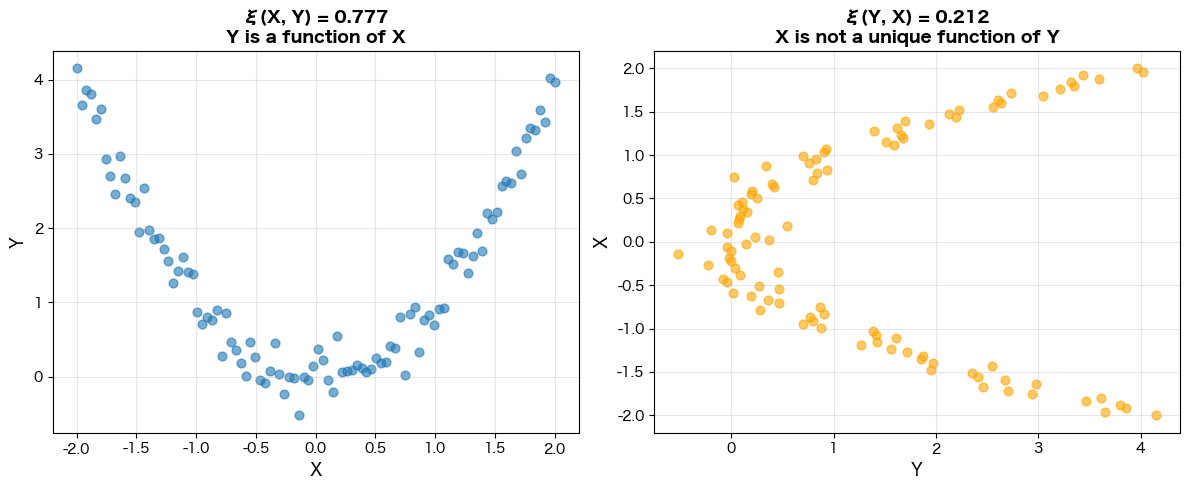

In [41]:
# Verify asymmetry of Chatterjee correlation
print("=" * 70)
print("Asymmetry of Chatterjee Correlation Coefficient")
print("=" * 70)

# Case: Y = X²
x_asym = np.linspace(-2, 2, 100)
y_asym = x_asym**2 + np.random.randn(100) * 0.2

# Calculate ξ(X, Y) and ξ(Y, X)
xi_xy, _, _ = chatterjee_correlation(x_asym, y_asym)
xi_yx, _, _ = chatterjee_correlation(y_asym, x_asym)

print(f"\nRelationship: Y = X²")
print(f"ξ(X, Y) = {xi_xy:.3f}  ← Functional relationship of Y from X")
print(f"ξ(Y, X) = {xi_yx:.3f}  ← Functional relationship of X from Y")
print(f"\nAsymmetry: ξ(X, Y) ≠ ξ(Y, X)")
print(f"This is because Y is a function of X, but X is not a unique function of Y (two X values correspond to one Y).")

# 視覚化
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ξ(X, Y)
axes[0].scatter(x_asym, y_asym, alpha=0.6, s=40)
axes[0].set_xlabel('X', fontsize=12)
axes[0].set_ylabel('Y', fontsize=12)
axes[0].set_title(f'ξ(X, Y) = {xi_xy:.3f}\nY is a function of X', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# ξ(Y, X)
axes[1].scatter(y_asym, x_asym, alpha=0.6, s=40, color='orange')
axes[1].set_xlabel('Y', fontsize=12)
axes[1].set_ylabel('X', fontsize=12)
axes[1].set_title(f'ξ(Y, X) = {xi_yx:.3f}\nX is not a unique function of Y', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## まとめ: 3つの相関係数の使い分け

| 状況 | 推奨する相関係数 | 理由 |
|------|-----------------|------|
| 線形関係を調べたい | **Pearson** | 最も一般的で解釈しやすい |
| 単調関係を調べたい | **Spearman** | 非線形でも単調なら検出可能 |
| 外れ値がある | **Spearman** または **Chatterjee** | 順位ベースで頑健 |
| 非単調な関数関係 | **Chatterjee** | U字型、逆U字型なども検出 |
| 因果関係の探索 | **Chatterjee** | 非対称性があり方向性を調べられる |
| 方向性(正負)が重要 | **Pearson** または **Spearman** | Chatterjeeは0〜1の範囲のみ |

### 参考文献
- Chatterjee, S. (2021). "A new coefficient of correlation." Journal of the American Statistical Association, 116(536), 2009-2022.
- 解説記事: https://qiita.com/Islay_tr/items/dd427ba86ba11bd25626